In [51]:
import matplotlib.pyplot as plt
import numpy as np
from einops import (
    pack,
    rearrange,
    reduce,
    repeat,
    unpack
)

### Import necessary images

In [2]:
dog_img = plt.imread('./common/assets/aki_dog.jpg')
cat_img = plt.imread('./common/assets/wonder_cat.jpg')

### Import an image

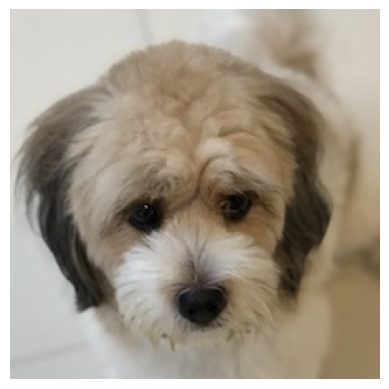

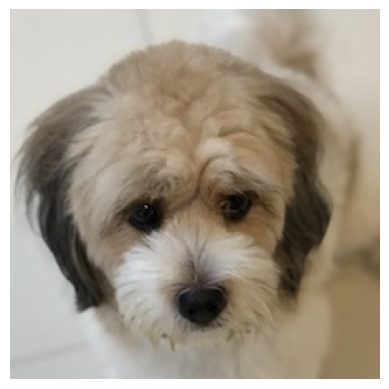

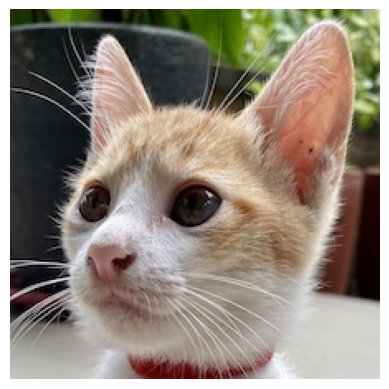

In [3]:
# plot the image
plt.imshow(dog_img)
plt.axis('off')
plt.show()

plt.imshow(cat_img)
plt.axis('off')
plt.show()

### Try for a rearrange

In [4]:
rearranged = rearrange(dog_img, 'h w c -> (h w c)')
rearranged.shape

(150528,)

### Try for patching

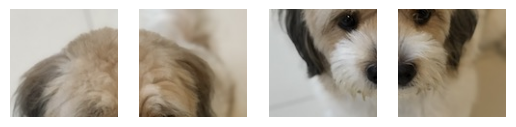

In [5]:
patched = rearrange(dog_img, '(p1 h) (p2 w) c -> (p1 p2) h w c', p1=2, p2=2)
# show the patched images side by side
for i in range(patched.shape[0]):
    plt.subplot(1, patched.shape[0], i + 1)
    plt.imshow(patched[i])
    plt.axis('off')
plt.show()

### Try for mixing

In [6]:
imgs = np.array([dog_img, cat_img])
imgs.shape
# batch height width channel

(2, 224, 224, 3)

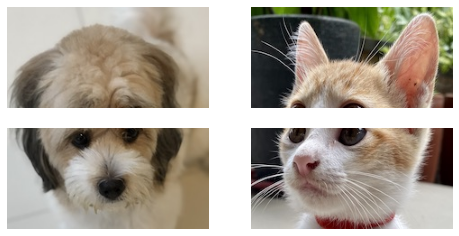

In [7]:
premix = rearrange(imgs, 'b (k h) w c -> k b h w c', k=2)

_, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 4), dpi=72, sharex=True, sharey=True)

for i in range(len(ax)):
    for j in range(len(ax)):
        ax[i][j].imshow(premix[i,j])
        ax[i][j].axis('off')

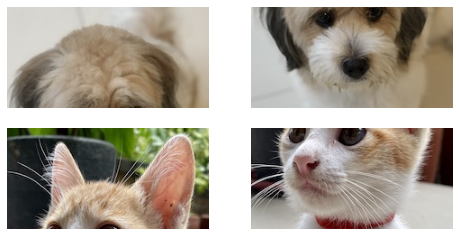

In [8]:
test = rearrange(imgs, 'b (k h) w c -> b k h w c', k=2)
# imgs has shape (k, b, h, w, c), so we can display the 2x2 grid of images
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 4), dpi=72, sharex=True, sharey=True)

for i in range(len(ax)):
    for j in range(len(ax)):
        ax[i][j].imshow(test[i,j])
        ax[i][j].axis('off')

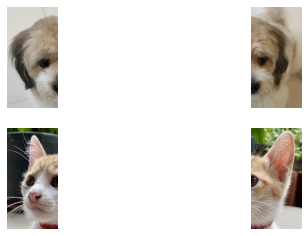

In [9]:
test = rearrange(imgs, 'b h (k w) c -> b k h w c', k=2)
# imgs has shape (k, b, h, w, c), so we can display the 2x2 grid of images
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 4), dpi=72, sharex=True, sharey=True)

for i in range(len(ax)):
    for j in range(len(ax)):
        ax[i][j].imshow(test[i,j])
        ax[i][j].axis('off')

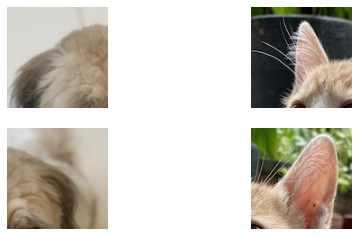

In [10]:
test = rearrange(imgs, 'b (k h) (j w) c -> (k j) b h w c', k=2, j=2)
# imgs has shape (k, b, h, w, c), so we can display the 2x2 grid of images
f_, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 4), dpi=72, sharex=True, sharey=True)

for i in range(len(ax)):
    for j in range(len(ax)):
        ax[i][j].imshow(test[i,j])
        ax[i][j].axis('off')

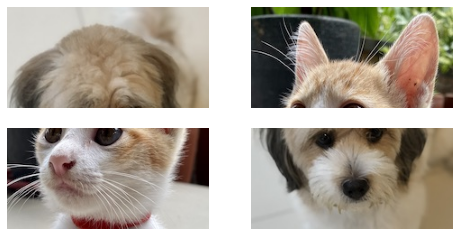

In [11]:
imgs = np.concatenate([premix[::2], premix[1::, ::-1]], axis=0)

_, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 4), dpi=72, sharex=True, sharey=True)

for i in range(len(ax)):
    for j in range(len(ax)):
        ax[i][j].imshow(imgs[i,j])
        ax[i][j].axis('off')

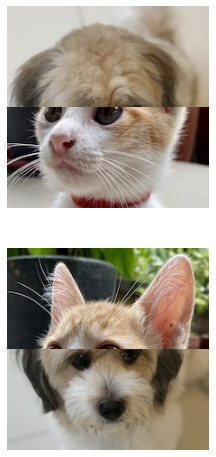

In [12]:
mixed = rearrange(imgs, 'k b h w c -> b (k h) w c')

# show the mixed images
_, ax = plt.subplots(nrows=2, ncols=1, figsize=(4, 8), dpi=72, sharex=True, sharey=True)
for i in range(len(ax)):
    ax[i].imshow(mixed[i])
    ax[i].axis('off')

### RGB to Grayscale

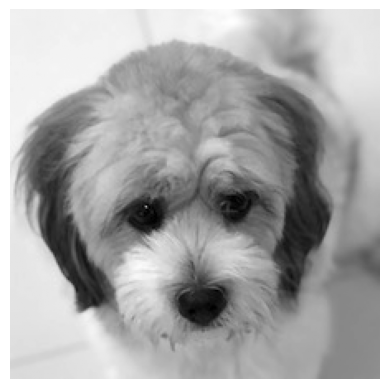

In [18]:
grayscaled = reduce(dog_img.astype(np.float32), 'h w c -> h w', 'mean')
plt.imshow(grayscaled, cmap='gray')
plt.axis('off')
plt.show()

### Upsize

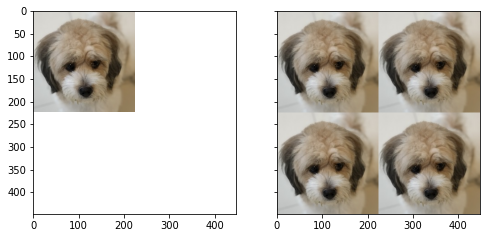

In [34]:
repeated = repeat(dog_img, 'h w c -> (2 h) (2 w) c')

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), dpi=72, sharex=True, sharey=True)
ax[0].imshow(dog_img)
ax[1].imshow(repeated)
plt.show()

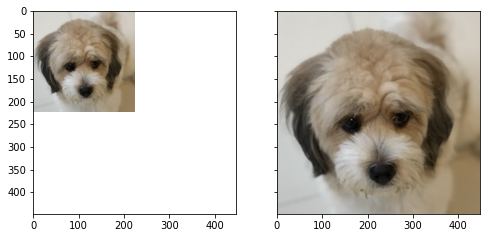

In [35]:
updated = repeat(dog_img, 'h w c -> (h 2) (w 2) c')

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), dpi=72, sharex=True, sharey=True)
ax[0].imshow(dog_img)
ax[1].imshow(updated)
plt.show()

### Downsize

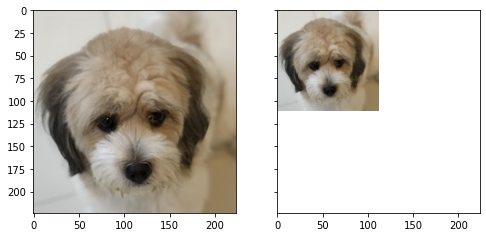

In [43]:
downsized = reduce(dog_img.astype(np.float32), '(h 2) (w 2) c -> h w c', 'mean').astype(np.uint8)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), dpi=72, sharex=True, sharey=True)
ax[1].imshow(downsized)
ax[0].imshow(dog_img)

### Pack

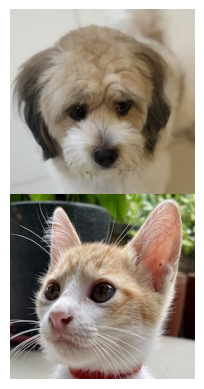

In [50]:
# using einops pack module, pack the dog image and the cat image vertically
packed, ps = pack((dog_img, cat_img), '* w c')
plt.imshow(packed)
plt.axis('off')
plt.show()

### Unpack

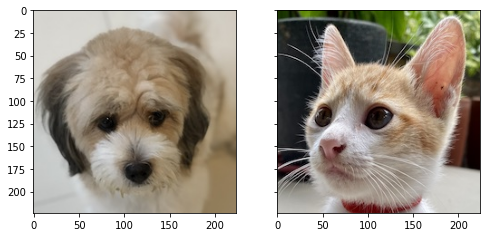

In [54]:
unpacked_dog, unpacked_cat = unpack(packed, ps, '* w c')
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), dpi=72, sharex=True, sharey=True)
ax[0].imshow(unpacked_dog)
ax[1].imshow(unpacked_cat)
plt.show()